In [ ]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)  # Adjust the number as needed
pd.set_option('display.max_columns', 100)  # Adjust the number as needed

# Load Data

In [ ]:
df = pd.read_csv("train.csv", index_col="index", low_memory=False)
df.head(10)

,borough,block,lot,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,sanitboro,sanitdistrict,sanitsub,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,landuse,easements,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,numbldgs,numfloors,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,tract2010,xcoord,ycoord,zonemap,target__office
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
574546,BX,3717,64,8.0,18.0,10472.0,E096,43.0,26.0,3020.0,2.0,9.0,1A,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1.0,0,2500,1540,0.0,1540.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,25.00,100.00,20.00,36.0,E,2.0,N,5.0,2.0,6532.0,19280.0,0.0,0.0,1940.0,0.0,0.0,NaN,NaN,0.62,48.0,1018914.0,239801.0,6C,False
12600,QN,15818,48,27.0,31.0,11691.0,E264,101.0,45.0,3800.0,4.0,14.0,2D,R4-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1.0,0,1225,594,0.0,594.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,25.00,49.00,18.00,33.0,NaN,1.0,N,5.0,0.0,1621.0,4178.0,0.0,0.0,1930.0,0.0,0.0,NaN,NaN,0.48,99802.0,1051073.0,155952.0,31A,False
235922,BK,6787,7,22.0,48.0,11229.0,E276,61.0,35.0,7320.0,3.0,15.0,2D,R3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1.0,0,4200,2889,0.0,2889.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,42.00,100.00,27.00,57.0,NaN,1.0,N,5.0,2.0,20300.0,57028.0,1470.0,1470.0,1930.0,0.0,0.0,NaN,NaN,0.69,548.0,998378.0,161944.0,23B,False
202581,BK,672,30,15.0,38.0,11232.0,E228,72.0,39.0,4400.0,3.0,7.0,2D,M1-2D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2.0,0,1669,2070,0.0,1380.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,16.67,100.17,16.67,41.0,NaN,3.0,N,5.0,1.0,2861.0,20242.0,0.0,0.0,1910.0,0.0,0.0,NaN,NaN,1.24,101.0,983777.0,178952.0,16B,False
155971,BK,6651,7501,21.0,44.0,11223.0,E330,62.0,37.0,8522.0,6.0,11.0,NaN,R7A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,4.0,1,4000,14369,2844.0,11525.0,2844.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,14.0,0.09,100.00,40.00,70.0,NaN,1.0,N,5.0,5.0,90001.0,1368456.0,0.0,356862.0,2002.0,0.0,0.0,NaN,NaN,3.59,426.0,990141.0,159965.0,22D,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588003,SI,2983,52,31.0,49.0,10305.0,E152,120.0,51.0,700.0,5.0,1.0,1C,R3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1.0,1,7950,720,0.0,720.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,50.00,159.00,26.00,55.0,NaN,1.0,N,5.0,2.0,11026.0,22636.0,6270.0,6270.0,1955.0,0.0,0.0,NaN,NaN,0.09,2001.0,964453.0,161242.0,21D,False
571409,QN,2237,31,28.0,29.0,11375.0,L151,112.0,46.0,1920.0,4.0,6.0,1E,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2.0,0,2000,4000,0.0,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,20.00,100.00,20.00,100.0,NaN,2.0,N,5.0,2.0,6057.0,40641.0,0.0,0.0,1983.0,0.0,0.0,NaN,NaN,2.00,75702.0,1028971.0,201865.0,14A,False
186807,SI,3121,107,31.0,50.0,10305.0,E161,122.0,51.0,910.0,5.0,2.0,1C,R3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1.0,0,2430,1690,0.0,1260.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,27.00,90.00,15.00,42.0,NaN,2.0,N,3.0,3.0,7983.0,27284.0,1470.0,1470.0,1996.0,0.0,0.0,NaN,NaN,0.70,74.0,966650.0,157198.0,27C,False


# Initial data analysis

In [ ]:
# Plot Missing Values
fig = plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
# percentage of missing data in each column
missing_data = (df.isnull().sum() / df.shape[0]) * 100
missing_data

"""more than 90% of the data is missing in below columns
'zonedist2', 'zonedist3', 'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2', 'ext',
'spdist3', ltdheight, 'histdist', 'landmark'
"""

In [ ]:
"""more than 90% of the data is missing in below columns
'zonedist2', 'zonedist3', 'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2', 'ext',
'spdist3', ltdheight, 'histdist', 'landmark'
"""

In [ ]:
#drop the above columns
df.drop(columns= ['zonedist2', 'zonedist3', 'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2', 'spdist3', 'ext', 'ltdheight', 'histdist', 'landmark'] , inplace=True)
df.head(10)

,borough,block,lot,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,sanitboro,sanitdistrict,sanitsub,zonedist1,splitzone,landuse,easements,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,numbldgs,numfloors,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,tract2010,xcoord,ycoord,zonemap,target__office
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
574546,BX,3717,64,8.0,18.0,10472.0,E096,43.0,26.0,3020.0,2.0,9.0,1A,R6,N,1.0,0,2500,1540,0,1540,0,0,0,0,0,0,1,2.00,1,25.00,100.00,20.00,36.0,2.0,N,5.0,2.0,6532,19280,0,0,1940,0,0,0.62,48,1018914.0,239801.0,6C,False
12600,QN,15818,48,27.0,31.0,11691.0,E264,101.0,45.0,3800.0,4.0,14.0,2D,R4-1,N,1.0,0,1225,594,0,594,0,0,0,0,0,0,1,1.00,1,25.00,49.00,18.00,33.0,1.0,N,5.0,0.0,1621,4178,0,0,1930,0,0,0.48,99802,1051073.0,155952.0,31A,False
235922,BK,6787,7,22.0,48.0,11229.0,E276,61.0,35.0,7320.0,3.0,15.0,2D,R3-2,N,1.0,0,4200,2889,0,2889,0,0,0,0,0,0,2,2.00,2,42.00,100.00,27.00,57.0,1.0,N,5.0,2.0,20300,57028,1470,1470,1930,0,0,0.69,548,998378.0,161944.0,23B,False
202581,BK,672,30,15.0,38.0,11232.0,E228,72.0,39.0,4400.0,3.0,7.0,2D,M1-2D,N,2.0,0,1669,2070,0,1380,0,0,0,0,0,0,1,2.00,3,16.67,100.17,16.67,41.0,3.0,N,5.0,1.0,2861,20242,0,0,1910,0,0,1.24,101,983777.0,178952.0,16B,False
155971,BK,6651,7501,21.0,44.0,11223.0,E330,62.0,37.0,8522.0,6.0,11.0,NaN,R7A,N,4.0,1,4000,14369,2844,11525,2844,0,0,0,0,0,1,7.00,14,0.09,100.00,40.00,70.0,1.0,N,5.0,5.0,90001,1368456,0,356862,2002,0,0,3.59,426,990141.0,159965.0,22D,False
496241,QN,1583,151,24.0,25.0,11373.0,E289,110.0,42.0,1420.0,4.0,4.0,2E,R5,N,2.0,0,2100,3202,0,3202,0,0,0,0,0,0,1,3.00,4,21.00,100.00,21.00,54.0,0.0,N,5.0,5.0,107585,149146,0,0,1968,0,0,1.52,471,1018443.0,209795.0,9D,False
788320,QN,8538,9,26.0,23.0,11040.0,E251,105.0,43.0,2170.0,4.0,13.0,1C,R2A,N,1.0,0,4200,1236,0,1236,0,0,0,0,0,0,1,1.67,1,42.00,100.00,25.00,36.5,1.0,N,5.0,2.0,15580,33962,1470,1470,1950,0,0,0.29,155102,1064643.0,212705.0,11D,False
444668,BK,7427,41,22.0,48.0,11235.0,E321,61.0,37.0,8900.0,3.0,15.0,4C,R3-2,N,1.0,0,2000,2440,0,2440,0,0,0,0,0,0,1,3.00,2,20.00,100.00,20.00,38.0,2.0,N,3.0,2.0,10493,35868,0,0,1955,0,0,1.22,626,1002246.0,155099.0,29A,False
806631,BX,5521,85,8.0,13.0,10465.0,E072,45.0,26.0,3220.0,2.0,10.0,2C,R3-1,N,1.0,0,3767,1540,0,1540,0,0,0,0,0,0,1,2.00,1,37.67,100.00,19.00,35.0,1.0,N,3.0,2.0,7634,26064,0,0,1930,0,0,0.41,118,1037553.0,236606.0,7C,False


Remove all the rows that have missing data

In [ ]:
# Get count of all rows in df and delete the rows that have null values
print(df.shape[0])
df.dropna(inplace=True)
print(df.shape[0])

687369
659152


# Data Pre-rocessing

In [ ]:
"""
1. One-hot encoding for borough
2. convert target__office to binary format(True/False)
"""

'\n1. One-hot encoding for borough\n2. convert target__office to binary format(True/False)\n'

In [ ]:
#one-hot encoding
borough = pd.get_dummies(df['borough'],prefix='borough')

df = pd.concat([borough, df], axis=1)

#drop the original coloumn
df.drop('borough', axis=1, inplace=True)

#convert target__office to binary format
df['target__office'] = df['target__office'].astype(int)

In [ ]:
#check firecomp relation to target_office

df['firecomp'] = df['firecomp'].str[0]

df[df['target__office'] == False]['firecomp'].describe()

count     653643
unique         3
top            E
freq      382324
Name: firecomp, dtype: object

In [ ]:
 df[df['target__office'] == True]['firecomp'].describe()

 #Nothing insigefull. This column can be deleted.

 df.drop('firecomp', axis=1, inplace=True)

In [ ]:
#Convert yearbuilt to Age of the building
import datetime

current_year = datetime.datetime.now().year
df['age'] = current_year - df['yearbuilt']
df['alter1_age'] = df['yearalter1'].apply(lambda x: current_year - x if x != 0 else 0)
df['alter2_age'] = df['yearalter2'].apply(lambda x: current_year - x if x != 0 else 0)
#drop yearbuilt column
df.drop(['yearbuilt','yearalter1', 'yearalter2'], axis=1, inplace=True)

In [ ]:
df.drop(['zonemap', 'sanitsub','zonedist1'], axis=1, inplace=True)

In [ ]:
# Converting 'Y' to 1 and 'N' to 0
df['irrlotcode'] = df['irrlotcode'].map({'Y': 1, 'N': 0})
df['splitzone'] = df['splitzone'].map({'Y': 1, 'N': 0})

In [ ]:
df['irrlotcode'].value_counts()

0    561857
1     97295
Name: irrlotcode, dtype: int64

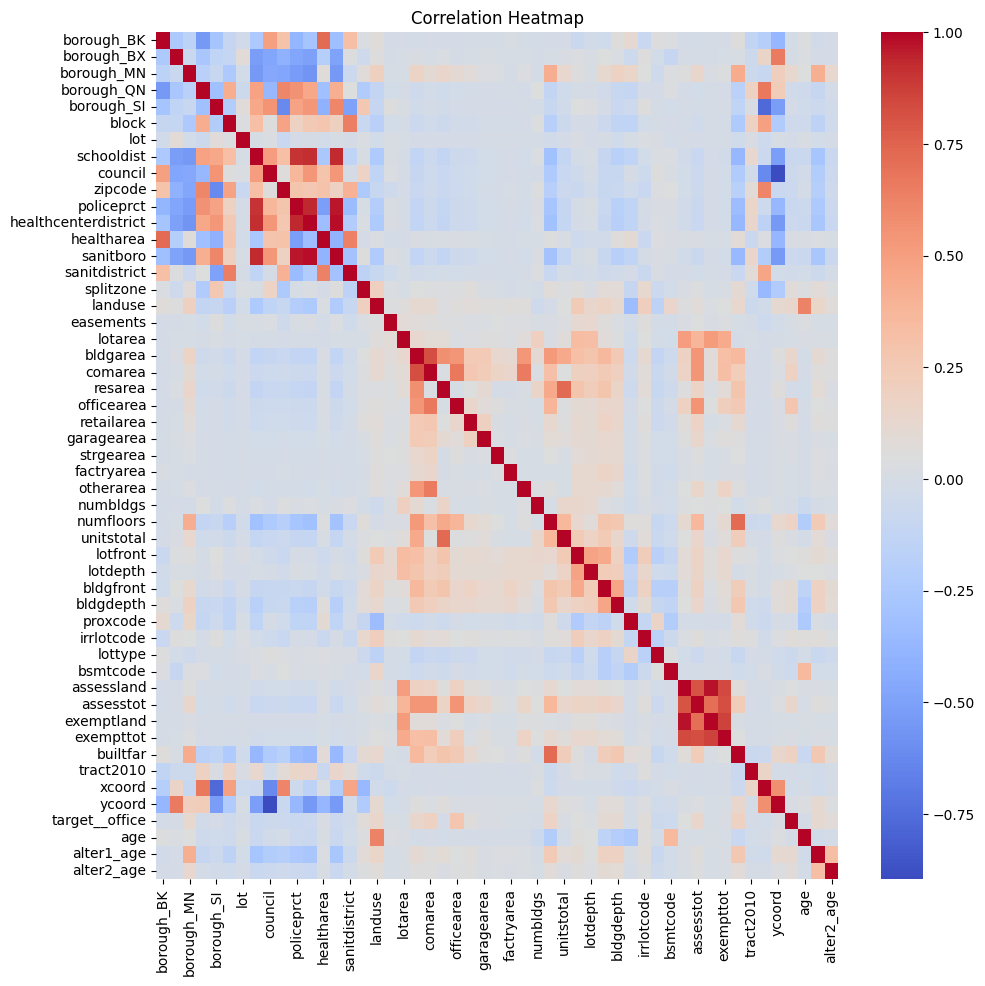

In [ ]:
# Calculating the correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(11, 11))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')  # 'coolwarm' is a color scheme, but you can choose another
plt.title('Correlation Heatmap')
plt.show()

# Some observations:

1. Lot and building dimensions are relate(ex: numfloors, lotdepth, bldgdepth). this is logical as larger lots have bigger buildings and higher assesstot

2.

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['borough'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='borough', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

NameError: ignored

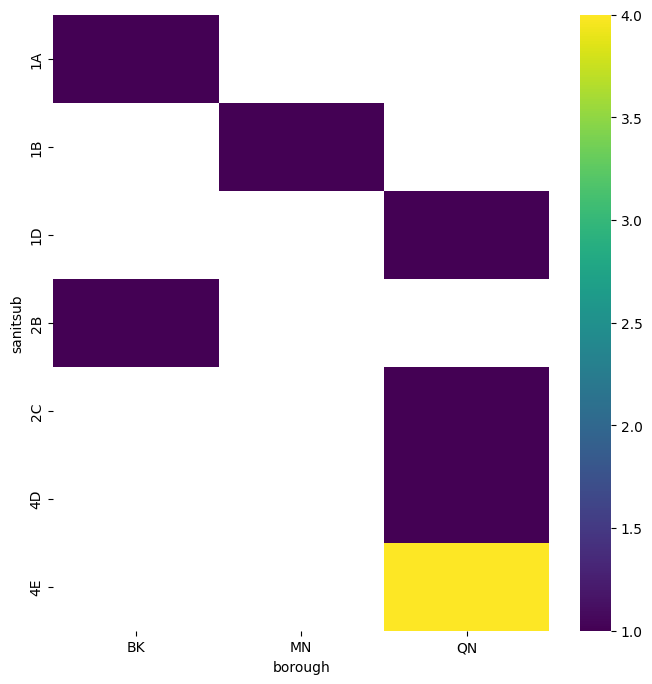

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sanitsub'].value_counts()
    for x_label, grp in _df_20.groupby('borough')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('borough')
_ = plt.ylabel('sanitsub')

In [ ]:
columns_of_interest = ['zonedist2', 'zonedist3', 'zonedist4', 'overlay1', 'overlay2', 'spdist2', 'spdist3', 'ltdheight', 'target__office']
filtered_data = df[columns_of_interest]

probability_results = {}

for column in columns_of_interest[:-1]:  # Exclude 'target__office' from the loop
    available_data = filtered_data[filtered_data[column].notnull()]
    if len(available_data) > 0:
        probability = (available_data['target__office'].sum() / len(available_data)) * 100
    else:
        probability = None  # In case there's no available data in the column

    probability_results[column] = probability

# Display the probability results
for column, probability in probability_results.items():
    print(f"Probability of 'target__office' being True where '{column}' is available: {probability}%")

NameError: ignored

In [ ]:
y = df["target__office"].copy(deep=True)

NameError: ignored

In [ ]:
model.predict(input_df)

AttributeError: ignored